## Load data and first analysis

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [80]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [81]:
#load the data
df = pd.read_csv('../data/fintech_users.csv')


In [82]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [83]:
print(df.shape)
print(df.dtypes)


(20000, 20)
Customer_ID                     object
Age                              int64
Location                        object
Income_Level                    object
Total_Transactions               int64
Avg_Transaction_Value          float64
Max_Transaction_Value          float64
Min_Transaction_Value          float64
Total_Spent                    float64
Active_Days                      int64
Last_Transaction_Days_Ago        int64
Loyalty_Points_Earned            int64
Referral_Count                   int64
Cashback_Received              float64
App_Usage_Frequency             object
Preferred_Payment_Method        object
Support_Tickets_Raised           int64
Issue_Resolution_Time          float64
Customer_Satisfaction_Score      int64
LTV                            float64
dtype: object


In [84]:
print(df.head())


  Customer_ID  Age  Location Income_Level  Total_Transactions  \
0  cust_13650   55  Suburban          Low                 218   
1   cust_2041   32  Suburban       Middle                 903   
2  cust_11668   51  Suburban         High                 383   
3   cust_1114   35     Urban       Middle                 527   
4  cust_16902   49  Suburban         High                 572   

   Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
0           14003.500400           78083.796073            5402.503048   
1            6354.617577            7226.129271            1278.849835   
2            2022.840288           22654.282835            2265.645612   
3           11314.070804           16882.865195            3669.154726   
4           17475.822516           33468.252767            3833.901472   

    Total_Spent  Active_Days  Last_Transaction_Days_Ago  \
0  3.052763e+06          185                        186   
1  5.738220e+06          298                  

In [85]:
print(df.isnull().sum())


Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64


In [86]:
print("\n--- Object columns ---")
print(df.select_dtypes(include='object').nunique())


--- Object columns ---
Customer_ID                 20000
Location                        3
Income_Level                    3
App_Usage_Frequency             3
Preferred_Payment_Method        4
dtype: int64


## Numeric value distribution

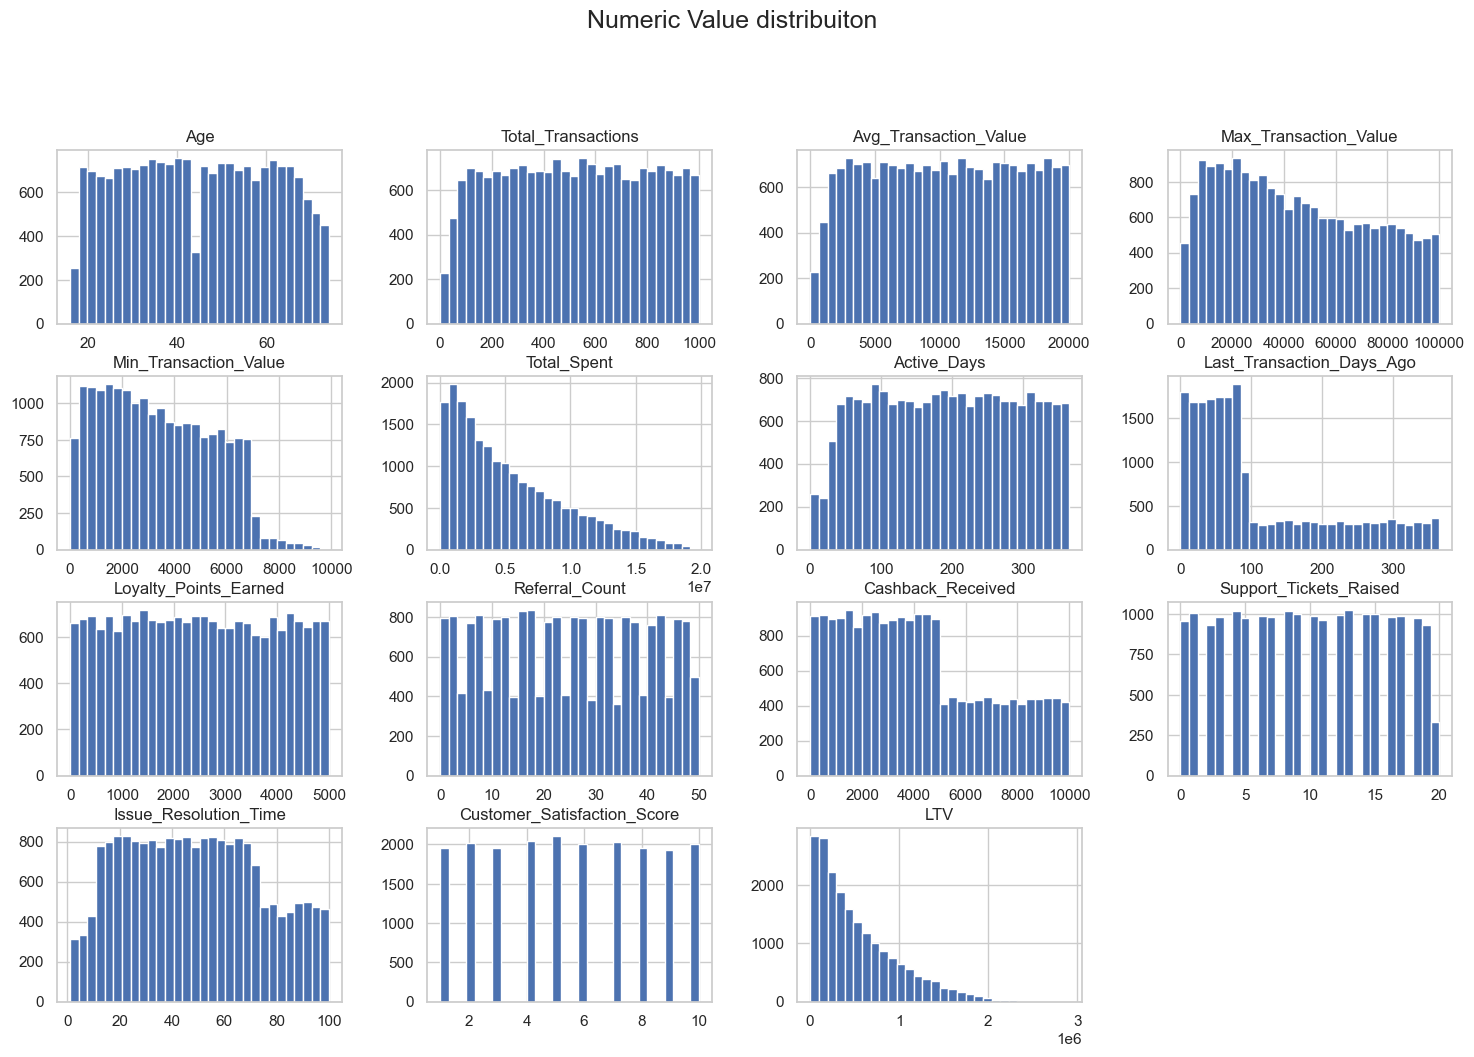

In [87]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Distribution
df[numeric_cols].hist(bins=30, figsize=(18, 14), layout=(5, 4))
plt.suptitle("Numeric Value distribuiton", fontsize=18)
plt.show()

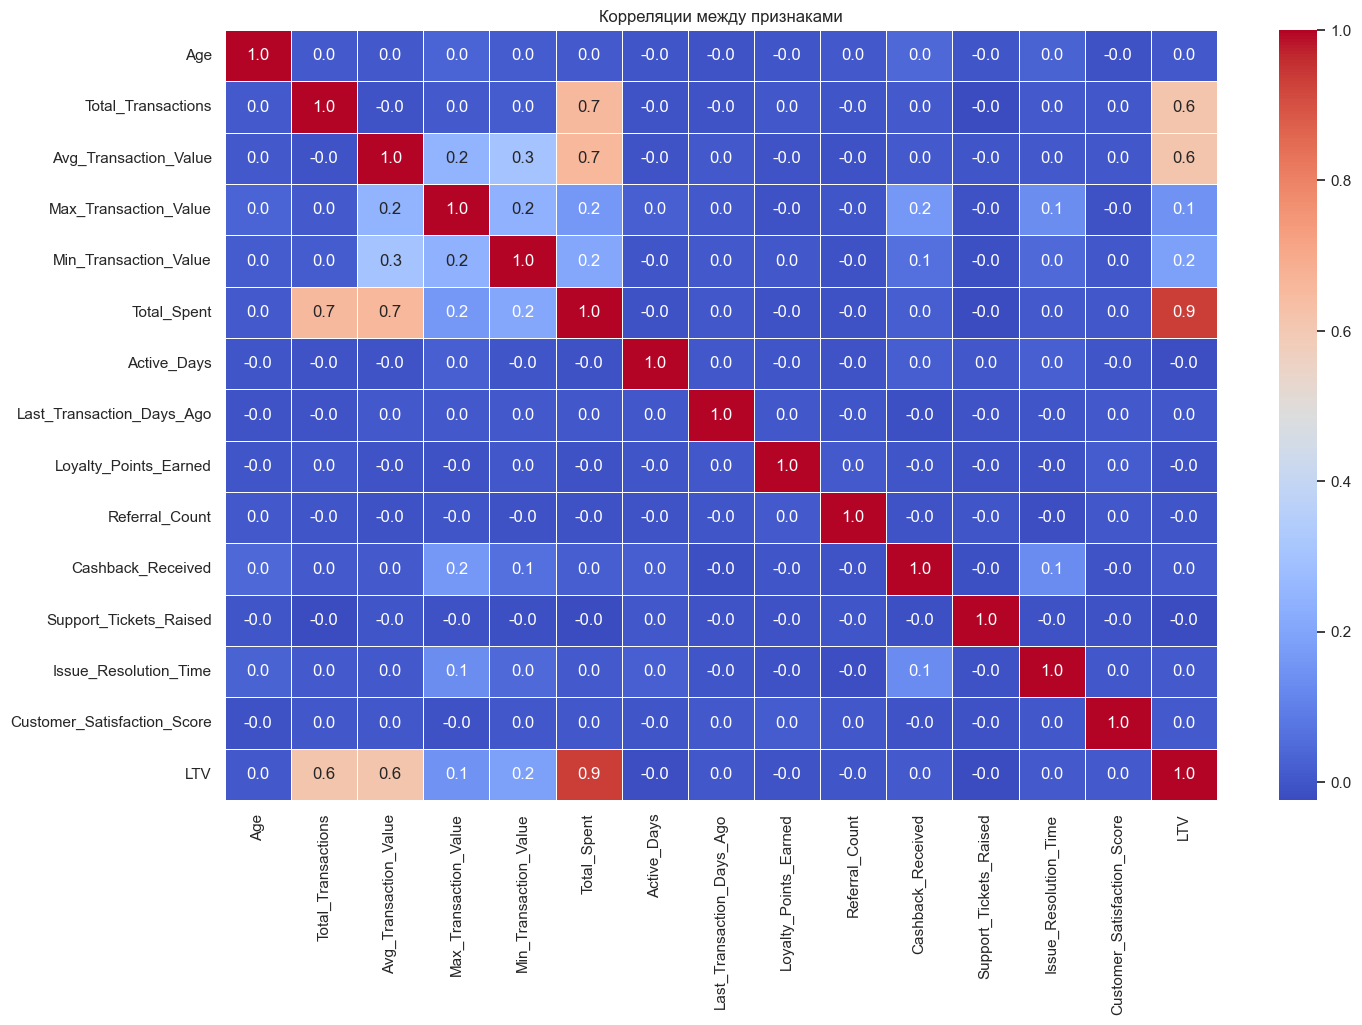

In [88]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляции между признаками")
plt.show()

### Creating another column is_churned based on time of last 90 day transactions

In [89]:
# Условие: если не было активности 90 дней и более — считаем, что ушёл
df['is_churned'] = df['Last_Transaction_Days_Ago'].apply(lambda x: 1 if x >= 90 else 0)

# Проверка
print(df['is_churned'].value_counts())

is_churned
0    12847
1     7153
Name: count, dtype: int64


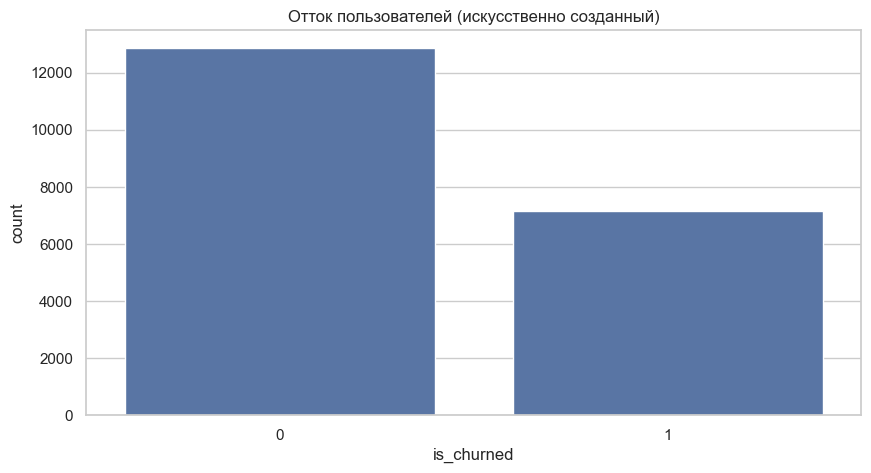

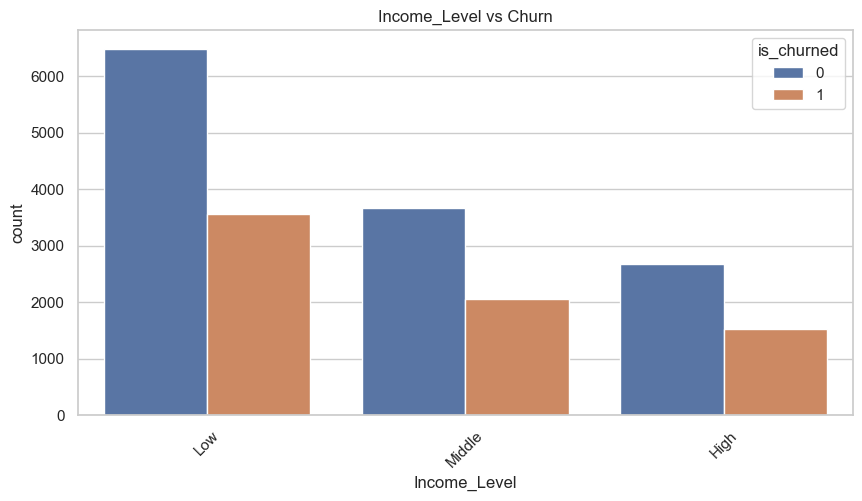

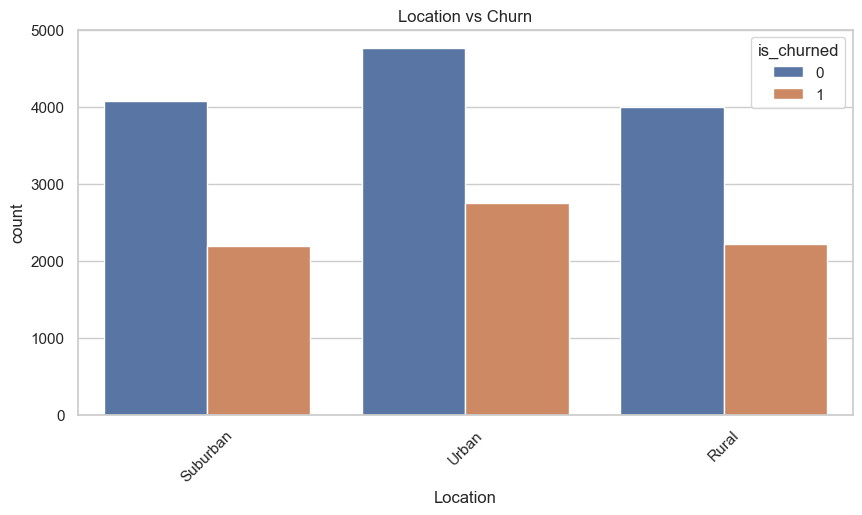

In [90]:
churn_col = 'is_churned'

sns.countplot(data=df, x=churn_col)
plt.title("Отток пользователей (искусственно созданный)")
plt.show()

# Влияние дохода и локации на отток
for col in ['Income_Level', 'Location']:
    sns.countplot(data=df, x=col, hue=churn_col)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

In [95]:
df['R'] = df['Last_Transaction_Days_Ago']
df['F'] = df['Total_Transactions']
df['M'] = df['Total_Spent']

df['R_rank'] = pd.qcut(df['R'], 5, labels=[5, 4, 3, 2, 1])
df['F_rank'] = pd.qcut(df['F'], 5, labels=[1, 2, 3, 4, 5])
df['M_rank'] = pd.qcut(df['M'], 5, labels=[1, 2, 3, 4, 5])

df['RFM_Score'] = df[['R_rank', 'F_rank', 'M_rank']].sum(axis=1)

df['RFM_Score'].head(100)

0      5
1     11
2      9
3      6
4     13
      ..
95     4
96     9
97     6
98    13
99    12
Name: RFM_Score, Length: 100, dtype: int64

In [96]:
df['Engagement_Score'] = df['Active_Days'] / (df['Last_Transaction_Days_Ago'] + 1)  # +1 чтобы избежать деления на 0


In [97]:
df['is_churned'] = (df['Last_Transaction_Days_Ago'] > 180).astype(int)


In [98]:
df['LTV_Class'] = pd.qcut(df['LTV'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [99]:
df.to_csv("prepared_data.csv", index=False)
